# a. Classification

**Step 1: Construction of 265 features**
   - MD, PSD, VFI (3)
   - Thresholds (54)
   - TD (52)
   - PD (52)
   - TD_NUM (52)
   - PD_NUM (52)

**Step 2: Classification**
   - Decision Tree
   - KNN (K Nearest Neighbors)
   
**Step 3: UMAP - reduce dimension to 2D**
   - for plotting the decision boundary

**Step 4: Evaluation UMAP**
   - use 2D-feature to refit classifiers
   
**Step 5: Plot the decision boundary**

In [1]:
# conda update anaconda

Solving environment: done

## Package Plan ##

  environment location: /Users/yuhuicao/opt/anaconda3

  added / updated specs:
    - anaconda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         484 KB
    anaconda-client-1.10.0     |   py37hecd8cb5_0         148 KB
    anaconda-project-0.10.2    |     pyhd3eb1b0_0         218 KB
    anyio-3.5.0                |   py37hecd8cb5_0         165 KB
    appdirs-1.4.4              |     pyhd3eb1b0_0          12 KB
    appnope-0.1.2              |py37hecd8cb5_1001          10 KB
    appscript-1.1.2            |   py37h9ed2024_0         130 KB
    argon2-cffi-21.3.0         |     pyhd3eb1b0_0          15 KB
    argon2-cffi-bindings-21.2.0|   py37hca72f7f_0          32 KB
    asn1crypto-1.5.1           |   py37hecd8cb5_0         167 KB
    astroid-2.9.0              |   py37hecd8cb5_0         335 

sortedcontainers-2.4 | 26 KB     | ##################################### | 100% 
freetype-2.11.0      | 589 KB    | ##################################### | 100% 
isort-5.9.3          | 83 KB     | ##################################### | 100% 
numexpr-2.8.3        | 121 KB    | ##################################### | 100% 
matplotlib-inline-0. | 12 KB     | ##################################### | 100% 
joblib-1.1.0         | 211 KB    | ##################################### | 100% 
entrypoints-0.4      | 16 KB     | ##################################### | 100% 
xlsxwriter-3.0.3     | 113 KB    | ##################################### | 100% 
glob2-0.7            | 12 KB     | ##################################### | 100% 
libgd-2.3.3          | 198 KB    | ##################################### | 100% 
mock-4.0.3           | 29 KB     | ##################################### | 100% 
fonts-anaconda-1     | 3 KB      | ##################################### | 100% 
importlib_resources- | 21 KB

pytest-openfiles-0.5 | 10 KB     | ##################################### | 100% 
libwebp-1.2.2        | 72 KB     | ##################################### | 100% 
jupyterlab_pygments- | 8 KB      | ##################################### | 100% 
defusedxml-0.7.1     | 23 KB     | ##################################### | 100% 
lzo-2.10             | 141 KB    | ##################################### | 100% 
libcxx-12.0.0        | 805 KB    | ##################################### | 100% 
rope-0.22.0          | 129 KB    | ##################################### | 100% 
sphinxcontrib-qthelp | 26 KB     | ##################################### | 100% 
path-16.2.0          | 23 KB     | ##################################### | 100% 
babel-2.9.1          | 5.5 MB    | ##################################### | 100% 
importlib-metadata-4 | 40 KB     | ##################################### | 100% 
pytest-cov-3.0.0     | 22 KB     | ##################################### | 100% 
anaconda-client-1.10 | 148 K

# Step 1: Construction of 265 features

In [1]:
# conda update anaconda   ### in jupyter notebook
# pip install -U numpy    ### in terminal

import numpy as np

print("The version of numpy is", np.__version__)

import pandas as pd
print("The version of pandas is", pd.__version__)

The version of numpy is 1.21.5
The version of pandas is 1.3.5


In [2]:
Grader1_labels_VF = pd.read_csv("11. Grader1_labels_VF.csv")
print("The shape of Grader1_labels_VF is ", Grader1_labels_VF.shape)
Grader1_labels_VF.head()

The shape of Grader1_labels_VF is  (301, 302)


,record_id,ptid,vstdate,OD_flag,Eye,sad,iad,dad,sns,ins,...,PD_NUM_45,PD_NUM_46,PD_NUM_47,PD_NUM_48,PD_NUM_49,PD_NUM_50,PD_NUM_51,PD_NUM_52,PD_NUM_53,PD_NUM_54
0,1,T0005,4/21/14,od,Right,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,T0005,4/21/14,os,Left,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,1.0,3.0,2.0,0.0
2,2,T0007,5/15/14,od,Right,1.0,0.0,0.0,0.0,1.0,...,4.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,4.0,1.0
3,2,T0007,5/15/14,os,Left,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,3,T0008,12/10/13,od,Right,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,4.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0


### Clean NaN: Drop 8 columns

In [3]:
### drop columns (8)
Grader1_labels_VF = Grader1_labels_VF.dropna(axis = 1)
Grader1_labels_VF.shape

(301, 294)

In [4]:
Grader1_labels_VF.columns[:35]

Index(['record_id', 'ptid', 'vstdate', 'OD_flag', 'Eye', 'sad', 'iad', 'dad',
       'sns', 'ins', 'cd', 'ci', 'tw', 'ls', 'ahfl', 'nhfl', 'apcre', 'efp',
       'efth', 'tld', 'nf', 'normal', 'abnormal', 'md', 'ms', 'BirthDate',
       'Age', 'TestStrategy', 'TestPattern', 'MD', 'PSD', 'VFI', 'Threshold_1',
       'Threshold_2', 'Threshold_3'],
      dtype='object')

In [5]:
Grader1_labels_VF.columns[29:]

Index(['MD', 'PSD', 'VFI', 'Threshold_1', 'Threshold_2', 'Threshold_3',
       'Threshold_4', 'Threshold_5', 'Threshold_6', 'Threshold_7',
       ...
       'PD_NUM_45', 'PD_NUM_46', 'PD_NUM_47', 'PD_NUM_48', 'PD_NUM_49',
       'PD_NUM_50', 'PD_NUM_51', 'PD_NUM_52', 'PD_NUM_53', 'PD_NUM_54'],
      dtype='object', length=265)

In [6]:
l1 = Grader1_labels_VF.columns[29:]

In [7]:
vf1 = Grader1_labels_VF[l1]
print("The shape of vf is", vf1.shape)
vf1.head()

The shape of vf is (301, 265)


,MD,PSD,VFI,Threshold_1,Threshold_2,Threshold_3,Threshold_4,Threshold_5,Threshold_6,Threshold_7,...,PD_NUM_45,PD_NUM_46,PD_NUM_47,PD_NUM_48,PD_NUM_49,PD_NUM_50,PD_NUM_51,PD_NUM_52,PD_NUM_53,PD_NUM_54
0,-0.765912,1.666142,98.864300,31.75,24.62,28.1,23.47,29.93,28.80,25.24,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.316483,1.901828,97.375084,26.20,25.90,21.4,26.85,31.83,30.27,28.57,...,0.0,0.0,0.0,3.0,0.0,1.0,1.0,3.0,2.0,0.0
2,-12.213348,11.677065,69.167710,6.13,-2.00,-2.0,-2.00,11.46,5.14,13.49,...,4.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,4.0,1.0
3,-13.520290,11.892563,64.562647,-2.00,-2.00,-2.0,-2.00,13.51,9.67,14.95,...,1.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,17.245180,4.580455,82.474727,49.63,46.56,39.8,41.30,49.63,49.35,49.56,...,0.0,2.0,4.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0


In [8]:
l2 = Grader1_labels_VF.columns[5:25]

vf2 = Grader1_labels_VF[l2]
print("The shape of vf is", vf2.shape)
vf2.head()

The shape of vf is (301, 20)


,sad,iad,dad,sns,ins,cd,ci,tw,ls,ahfl,nhfl,apcre,efp,efth,tld,nf,normal,abnormal,md,ms
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [9]:
vf = pd.concat([vf1, vf2], axis = 1)

vf['ptid'] = Grader1_labels_VF['ptid']
vf['Eye'] = Grader1_labels_VF['Eye']

print("The shape of vf is", vf.shape)
vf.head()

The shape of vf is (301, 287)


,MD,PSD,VFI,Threshold_1,Threshold_2,Threshold_3,Threshold_4,Threshold_5,Threshold_6,Threshold_7,...,efp,efth,tld,nf,normal,abnormal,md,ms,ptid,Eye
0,-0.765912,1.666142,98.864300,31.75,24.62,28.1,23.47,29.93,28.80,25.24,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,T0005,Right
1,-1.316483,1.901828,97.375084,26.20,25.90,21.4,26.85,31.83,30.27,28.57,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,T0005,Left
2,-12.213348,11.677065,69.167710,6.13,-2.00,-2.0,-2.00,11.46,5.14,13.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T0007,Right
3,-13.520290,11.892563,64.562647,-2.00,-2.00,-2.0,-2.00,13.51,9.67,14.95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T0007,Left
4,17.245180,4.580455,82.474727,49.63,46.56,39.8,41.30,49.63,49.35,49.56,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,T0008,Right


In [10]:
print("Contains NaN?", vf.isnull().values.any())
print("Number of NaN:", vf.isnull().sum().sum())

Contains NaN? False
Number of NaN: 0


# Step 2: Classification

In [11]:
import numpy as np

#Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ensemble Methods
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
#from sklearn.ensemble import AdaBoostClassifier

# 在terminal里run
# pip uninstall scikit-learn
# pip install scikit-learn==0.18.2

In [12]:
X = vf1.to_numpy()
Y = vf["normal"].to_numpy()
print("The shape of X is ", X.shape)
print("The shape of Y is ", Y.shape)

The shape of X is  (301, 265)
The shape of Y is  (301,)


In [13]:
vf1.describe()

,MD,PSD,VFI,Threshold_1,Threshold_2,Threshold_3,Threshold_4,Threshold_5,Threshold_6,Threshold_7,...,PD_NUM_45,PD_NUM_46,PD_NUM_47,PD_NUM_48,PD_NUM_49,PD_NUM_50,PD_NUM_51,PD_NUM_52,PD_NUM_53,PD_NUM_54
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,-3.813006,3.494330,91.296396,20.795482,20.901927,20.324917,20.294850,23.193522,24.684485,24.117973,...,0.657807,0.491694,0.770764,0.521595,0.289037,0.471761,0.877076,0.980066,0.830565,0.691030
std,5.410805,2.911504,15.403329,8.560558,8.598235,8.722208,8.669506,8.157705,7.504720,8.225993,...,1.285501,1.176477,1.328135,1.118197,0.944905,1.121026,1.417100,1.465015,1.449550,1.314364
min,-32.163725,0.933648,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.029382,1.703477,91.557924,17.860000,18.450000,17.840000,17.450000,21.500000,23.350000,22.640000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.389565,2.275021,97.058072,23.300000,23.210000,22.750000,22.750000,25.600000,26.970000,26.570000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.765912,4.119056,98.860954,26.180000,26.510000,25.810000,26.130000,28.120000,29.000000,28.770000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,17.245180,16.453277,100.000000,49.630000,46.560000,39.800000,41.300000,49.630000,49.350000,49.560000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


### Model Evaluation Matrics
Let's see what model evaluation matrics we have/can use.
- from scikit-learn package

In [14]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### Let's see if the data is balanced or not?
- "normal"

In [15]:
print("The number of normal is", Y.sum())
print("The proportion of normal is", Y.sum()/len(Y))

The number of normal is 170.0
The proportion of normal is 0.5647840531561462


**Summary**: The label "normal" is relatively balanced.

### a. Decision Tree

In [16]:
dt1 = DecisionTreeClassifier (max_depth=6)
dt1_scores = cross_val_score (dt1, X, Y, cv = 10, scoring = 'f1') 
[dt1_scores.mean(), dt1_scores.std()]

[0.7476967484726105, 0.061685930789686316]

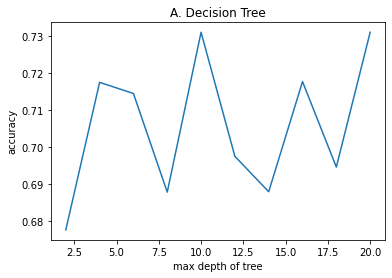

In [17]:
depth = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
accuracy = []

for i in range(len(depth)):
    dt = DecisionTreeClassifier (max_depth = depth[i])
    dt_scores = cross_val_score (dt, X, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(dt_scores.mean())
    
plt.plot(depth, accuracy)
plt.title("A. Decision Tree")
plt.xlabel("max depth of tree")
plt.ylabel("accuracy")
plt.show()

### b. KNN classifier

In [18]:
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1_scores = cross_val_score(knn1, X, Y, cv=10, scoring = 'accuracy') 
[knn1_scores.mean(), knn1_scores.std()]

[0.7504301075268817, 0.06618006597971153]

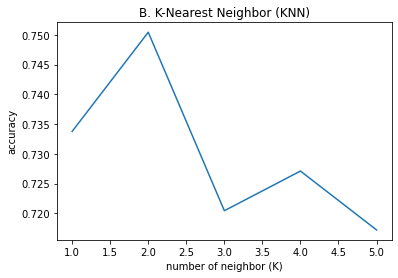

In [19]:
n_neighbors = [1,2,3,4,5]
accuracy = []

for i in range(len(n_neighbors)):
    knn = KNeighborsClassifier (n_neighbors = n_neighbors[i])
    knn_scores = cross_val_score (knn, X, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(knn_scores.mean())
    
plt.plot(n_neighbors, accuracy)
plt.title("B. K-Nearest Neighbor (KNN)")
plt.xlabel("number of neighbor (K)")
plt.ylabel("accuracy")
plt.show()

### c. Naive Bayes

In [20]:
nb1=GaussianNB()
nb1_scores = cross_val_score(nb1, X, Y, cv = 10, scoring='accuracy') 
[nb1_scores.mean(), nb1_scores.std()]

[0.7011827956989247, 0.09814612949870398]

### d. Support Vector Machines (Linear)

In [21]:
svm_linear1 = SVC(C=0.01, kernel = 'linear')
svm_linear1_scores = cross_val_score(svm_linear1, X, Y, cv = 10, 
                                     scoring = "accuracy")
[svm_linear1_scores.mean(), svm_linear1_scores.std()]

[0.7474193548387096, 0.10149814308108002]

In [22]:
svm_linear1 = SVC(C=0.1, kernel = 'linear')
svm_linear1_scores = cross_val_score(svm_linear1, X, Y, cv = 10, 
                                     scoring = "accuracy")
[svm_linear1_scores.mean(), svm_linear1_scores.std()]

[0.7575268817204301, 0.05353985767886264]

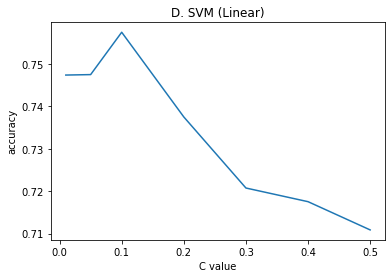

In [23]:
C = [0.01,0.05, 0.1, 0.2,0.3, 0.4, 0.5]
accuracy = []

for i in range(len(C)):
    svm_linear = SVC(C=C[i], kernel = 'linear')
    svm_scores = cross_val_score (svm_linear, X, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(svm_scores.mean())
    
plt.plot(C, accuracy)
plt.title("D. SVM (Linear)")
plt.xlabel("C value")
plt.ylabel("accuracy")
plt.show()

### e. Random Forest

In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10, 
                            #min_samples_split = 0.01, min_samples_leaf = 0.01
                           )
# Evaluation - Cross Validation
rf_scores = cross_val_score(rf, X, Y, cv = 10, scoring = "accuracy")
[rf_scores.mean(), rf_scores.std()]

[0.770752688172043, 0.08360005875058307]

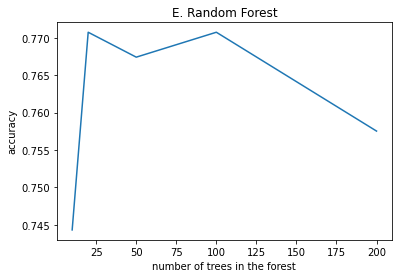

In [26]:
n_estimators = [10, 20, 50, 100, 200]
accuracy = []

for i in range(len(n_estimators)):
    rf = RandomForestClassifier(n_estimators = n_estimators[i], #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10
                            #min_samples_split = 0.01, #min_samples_leaf = 0.01
                               )
    rf_scores = cross_val_score (rf, X, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(rf_scores.mean())
    
plt.plot(n_estimators, accuracy)
plt.title("E. Random Forest")
plt.xlabel("number of trees in the forest")
plt.ylabel("accuracy")
plt.show()

### f. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,Y)
LR = LogisticRegression(C=0.0007, solver='liblinear') # random_state=0
LR_scores = cross_val_score(LR, X, Y, cv = 10, scoring = "accuracy")
[LR_scores.mean(), LR_scores.std()]

[0.7640860215053763, 0.07816723595283358]

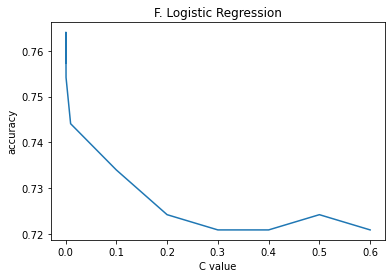

In [28]:
C = [0.0005, 0.0007, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
accuracy = []

for i in range(len(C)):
    LR = LogisticRegression(C=C[i], solver='liblinear') # random_state=0
    LR_scores = cross_val_score (LR, X, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(LR_scores.mean())
    
plt.plot(C, accuracy)
plt.title("F. Logistic Regression")
plt.xlabel("C value")
plt.ylabel("accuracy")
plt.show()

# Step 3: UMAP - reduce dimension to 2D
- for plotting the decision boundary

In [29]:
# pip install umap-learn

# pip uninstall numba
# pip install numba==0.51   #### 需要把numba downgrade到更低的版本～

import numba
import sklearn

print("The version of numba is", numba.__version__)
print("The version of sklearn is", sklearn.__version__)

The version of numba is 0.51.0
The version of sklearn is 1.0.2


In [30]:
import umap
reducer = umap.UMAP()

In [31]:
embedding = reducer.fit_transform(X)
embedding.shape

(301, 2)

In [32]:
print("The type of embedding is ", type(embedding))
print("The type of Y is ", type(Y))
print("The shape of embedding is ", embedding.shape)
print("The shape of Y is ", Y.shape)

The type of embedding is  <class 'numpy.ndarray'>
The type of Y is  <class 'numpy.ndarray'>
The shape of embedding is  (301, 2)
The shape of Y is  (301,)


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'UMAP projection: UAB - 265 features - label "normal"')

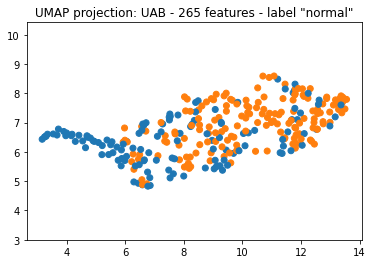

In [34]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in vf.normal.map({0.0:0, 1.0:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection: UAB - 265 features - label "normal"')

# Step 4: Evaluation UMAP: 
- use 2D-feature to refit classifiers

### a. Decision Tree

In [35]:
dt1 = DecisionTreeClassifier (max_depth=6)
dt1_scores = cross_val_score (dt1, embedding, Y, cv = 10, scoring = 'f1') 
[dt1_scores.mean(), dt1_scores.std()]

[0.722375553064541, 0.07721568465555793]

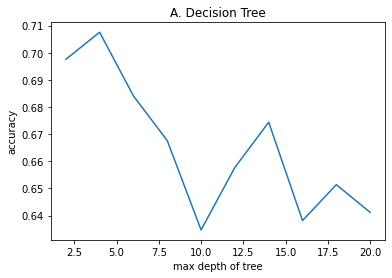

In [36]:
depth = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
accuracy = []

for i in range(len(depth)):
    dt = DecisionTreeClassifier (max_depth = depth[i])
    dt_scores = cross_val_score (dt, embedding, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(dt_scores.mean())
    
plt.plot(depth, accuracy)
plt.title("A. Decision Tree")
plt.xlabel("max depth of tree")
plt.ylabel("accuracy")
plt.show()

### b. KNN classifier

In [37]:
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1_scores = cross_val_score(knn1, embedding, Y, cv=10, scoring = 'accuracy') 
[knn1_scores.mean(), knn1_scores.std()]

[0.6010752688172042, 0.08523430127596292]

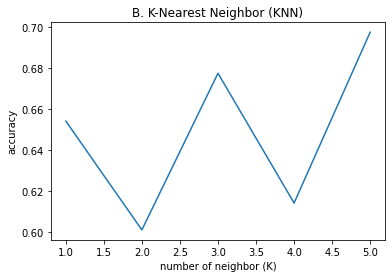

In [38]:
n_neighbors = [1,2,3,4,5]
accuracy = []

for i in range(len(n_neighbors)):
    knn = KNeighborsClassifier (n_neighbors = n_neighbors[i])
    knn_scores = cross_val_score (knn, embedding, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(knn_scores.mean())
    
plt.plot(n_neighbors, accuracy)
plt.title("B. K-Nearest Neighbor (KNN)")
plt.xlabel("number of neighbor (K)")
plt.ylabel("accuracy")
plt.show()

### c. Naive Bayes

In [39]:
nb1=GaussianNB()
nb1_scores = cross_val_score(nb1, embedding, Y, cv = 10, scoring='accuracy') 
[nb1_scores.mean(), nb1_scores.std()]

[0.7105376344086022, 0.09025701665456336]

### d. Support Vector Machines (Linear)

In [40]:
svm_linear1 = SVC(C=0.01, kernel = 'linear')
svm_linear1_scores = cross_val_score(svm_linear1, embedding, Y, cv = 10, 
                                     scoring = "accuracy")
[svm_linear1_scores.mean(), svm_linear1_scores.std()]

[0.7106451612903225, 0.08378469508253188]

In [41]:
svm_linear1 = SVC(C=0.1, kernel = 'linear')
svm_linear1_scores = cross_val_score(svm_linear1, embedding, Y, cv = 10, 
                                     scoring = "accuracy")
[svm_linear1_scores.mean(), svm_linear1_scores.std()]

[0.7105376344086022, 0.08901745240771557]

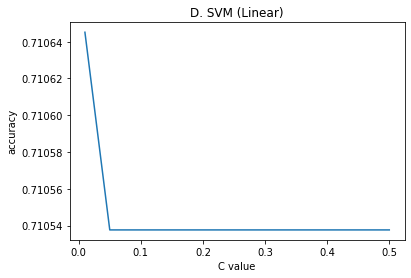

In [42]:
C = [0.01,0.05, 0.1, 0.2,0.3, 0.4, 0.5]
accuracy = []

for i in range(len(C)):
    svm_linear = SVC(C=C[i], kernel = 'linear')
    svm_scores = cross_val_score (svm_linear, embedding, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(svm_scores.mean())
    
plt.plot(C, accuracy)
plt.title("D. SVM (Linear)")
plt.xlabel("C value")
plt.ylabel("accuracy")
plt.show()

### e. Random Forest

In [43]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10, 
                            #min_samples_split = 0.01, min_samples_leaf = 0.01
                           )
# Evaluation - Cross Validation
rf_scores = cross_val_score(rf, embedding, Y, cv = 10, scoring = "accuracy")
[rf_scores.mean(), rf_scores.std()]

[0.6773118279569893, 0.08535284473866842]

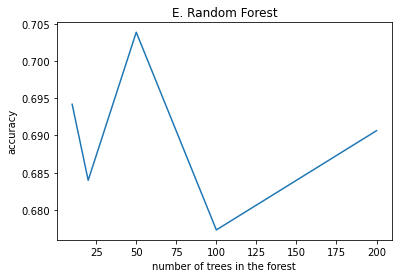

In [45]:
n_estimators = [10, 20, 50, 100, 200]
accuracy = []

for i in range(len(n_estimators)):
    rf = RandomForestClassifier(n_estimators = n_estimators[i], #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10
                            #min_samples_split = 0.01, #min_samples_leaf = 0.01
                               )
    rf_scores = cross_val_score (rf, embedding, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(rf_scores.mean())
    
plt.plot(n_estimators, accuracy)
plt.title("E. Random Forest")
plt.xlabel("number of trees in the forest")
plt.ylabel("accuracy")
plt.show()

### f. Logistic Regression

In [46]:
#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,Y)
LR = LogisticRegression(C=0.0007, solver='liblinear') # random_state=0
LR_scores = cross_val_score(LR, embedding, Y, cv = 10, scoring = "accuracy")
[LR_scores.mean(), LR_scores.std()]

[0.5648387096774192, 0.005483870967741944]

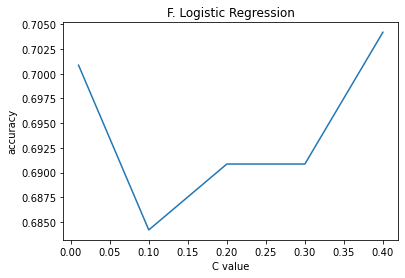

In [47]:
C = [0.01, 0.1, 0.2, 0.3, 0.4]
accuracy = []

for i in range(len(C)):
    LR = LogisticRegression(C=C[i], solver='liblinear') # random_state=0
    LR_scores = cross_val_score (LR, embedding, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(LR_scores.mean())
    
plt.plot(C, accuracy)
plt.title("F. Logistic Regression")
plt.xlabel("C value")
plt.ylabel("accuracy")
plt.show()

# Step 5: Plot the decision boundary

In [48]:
#!pip install --user mlxtend

#Mlxtend for visualizing classification decision boundaries
from mlxtend.plotting import plot_decision_regions

In [52]:
Y = Y.astype(np.int64)

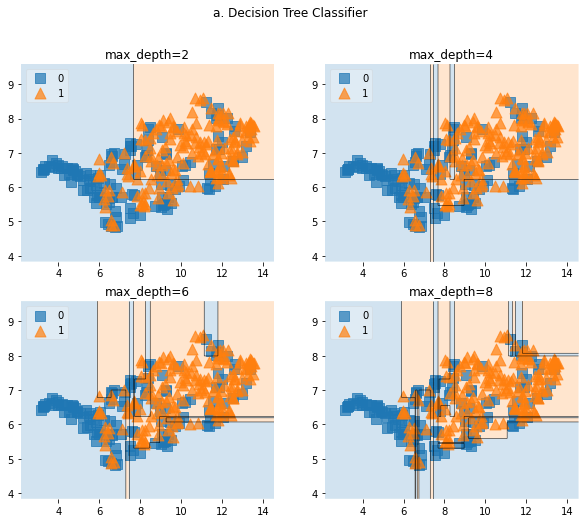

In [53]:
# 1. Creating one instance for each Decision Tree
dt1 = DecisionTreeClassifier (max_depth=2)
dt2 = DecisionTreeClassifier (max_depth=4)
dt3 = DecisionTreeClassifier (max_depth=6)
dt4 = DecisionTreeClassifier (max_depth=8)

# 2. Creating a list of classifiers and their names for plotting
clf_list = [dt1, dt2, dt3, dt4]
labels = ['max_depth=2','max_depth=4','max_depth=6','max_depth=8']
# ======================================================================== 
##### 3. parameters to set size or markers, contours, and transparency 
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7} 
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7} 
# ========================================================================

# 4. plotting the decision boundaries
fig = plt.figure(figsize=(10,8)) 
count = 0;

for clf, label in zip(clf_list, labels): 
    count = count + 1;
    clf.fit(embedding, Y)
    ax = plt.subplot(2,2,count)
    plt.suptitle("a. Decision Tree Classifier")
    fig = plot_decision_regions(X=embedding, y=Y, clf=clf, legend=2, 
                                scatter_kwargs=scatter_kwargs,
                                contourf_kwargs=contourf_kwargs, 
                                scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(label) 
plt.savefig('/Users/yuhuicao/Desktop/2. Classification - normal/Decision Boundary/1. Decision Tree Boundary.png')
plt.show()

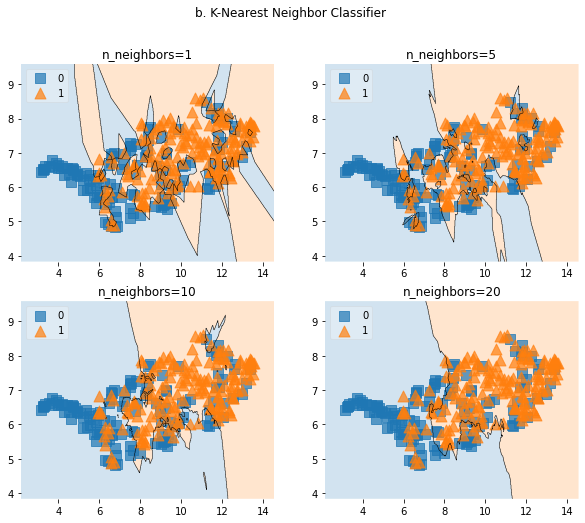

In [54]:
# 1. Creating one instance for each Decision Tree
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn2 = KNeighborsClassifier(n_neighbors=5) 
knn3 = KNeighborsClassifier(n_neighbors=10) 
knn4 = KNeighborsClassifier(n_neighbors=20)

# 2. Creating a list of classifiers and their names for plotting
clf_list = [knn1, knn2, knn3, knn4]
labels = ['n_neighbors=1','n_neighbors=5','n_neighbors=10','n_neighbors=20']
# ======================================================================== 
##### 3. parameters to set size or markers, contours, and transparency 
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7} 
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7} 
# ========================================================================

# 4. plotting the decision boundaries
fig = plt.figure(figsize=(10,8)) 
count = 0;

for clf, label in zip(clf_list, labels): 
    count = count + 1;
    clf.fit(embedding, Y)
    ax = plt.subplot(2,2,count)
    plt.suptitle("b. K-Nearest Neighbor Classifier")
    fig = plot_decision_regions(X=embedding, y=Y, clf=clf, legend=2, 
                                scatter_kwargs=scatter_kwargs,
                                contourf_kwargs=contourf_kwargs, 
                                scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(label) 
plt.savefig('/Users/yuhuicao/Desktop/2. Classification - normal/Decision Boundary/2. KNN.png')

plt.show()

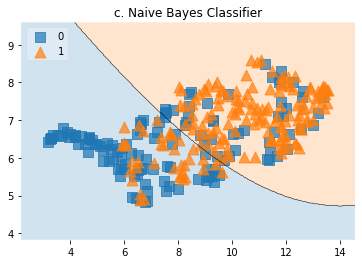

In [55]:
# 1. Training a classifier
nb1=GaussianNB() 
nb1.fit(embedding, Y)

# 2. parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7} 
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# 3. passing above parameters to the plotting function
plot_decision_regions(X=embedding, y=Y, clf=nb1, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs, 
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# 4. Adding axes annotations
#plt.xlabel('Attribute x1') 
#plt.ylabel('Attribute x2') 
plt.title('c. Naive Bayes Classifier') 
plt.savefig('/Users/yuhuicao/Desktop/2. Classification - normal/Decision Boundary/3. Naive Bayes.png')

plt.show()

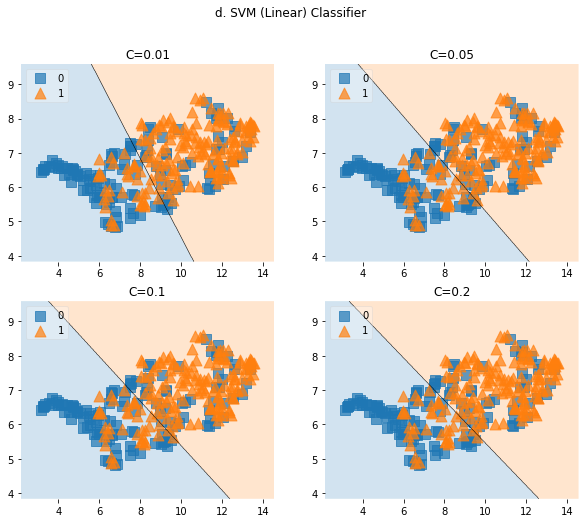

In [56]:
# 1. Creating one instance for each Decision Tree
svm_linear1 = SVC(C=0.01, kernel = 'linear')
svm_linear2 = SVC(C=0.05, kernel = 'linear')
svm_linear3 = SVC(C=0.1 , kernel = 'linear')
svm_linear4 = SVC(C=0.2 , kernel = 'linear')

# 2. Creating a list of classifiers and their names for plotting
clf_list = [svm_linear1, svm_linear2, svm_linear3, 
            svm_linear4]
labels = ['C=0.01','C=0.05','C=0.1','C=0.2']
# ======================================================================== 
##### 3. parameters to set size or markers, contours, and transparency 
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7} 
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7} 
# ========================================================================

# 4. plotting the decision boundaries
fig = plt.figure(figsize=(10,8)) 
count = 0;

for clf, label in zip(clf_list, labels): 
    count = count + 1;
    clf.fit(embedding, Y)
    ax = plt.subplot(2,2,count)
    plt.suptitle("d. SVM (Linear) Classifier")
    fig = plot_decision_regions(X=embedding, y=Y, clf=clf, legend=2, 
                                scatter_kwargs=scatter_kwargs,
                                contourf_kwargs=contourf_kwargs, 
                                scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(label) 
plt.savefig('/Users/yuhuicao/Desktop/2. Classification - normal/Decision Boundary/4. SVM (Linear).png')

plt.show()

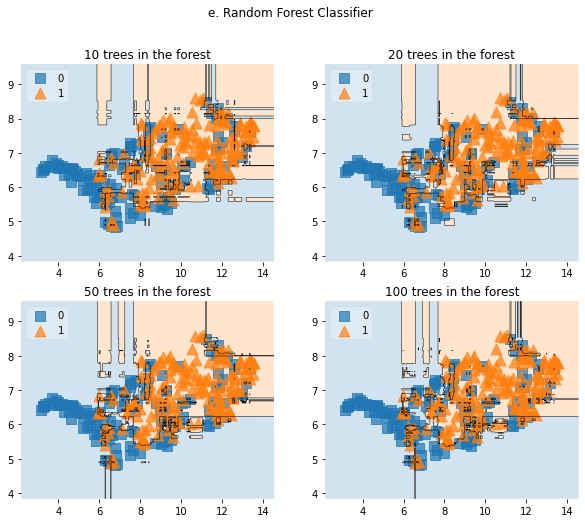

In [57]:
n_estimators = [10, 20, 50, 100, 200]
# 1. Creating one instance for each Decision Tree
rf1 = RandomForestClassifier(n_estimators = 10, random_state = 42, 
                            max_features = 'sqrt', max_depth=10)
rf2 = RandomForestClassifier(n_estimators = 20, random_state = 42, 
                            max_features = 'sqrt', max_depth=10)
rf3 = RandomForestClassifier(n_estimators = 50, random_state = 42, 
                            max_features = 'sqrt', max_depth=10)
rf4 = RandomForestClassifier(n_estimators = 100, random_state = 42, 
                            max_features = 'sqrt', max_depth=10)

# 2. Creating a list of classifiers and their names for plotting
clf_list = [rf1, rf2, rf3, rf4 ]
labels = ['10 trees in the forest','20 trees in the forest',
          '50 trees in the forest','100 trees in the forest']
# ======================================================================== 
##### 3. parameters to set size or markers, contours, and transparency 
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7} 
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7} 
# ========================================================================

# 4. plotting the decision boundaries
fig = plt.figure(figsize=(10,8)) 
count = 0;

for clf, label in zip(clf_list, labels): 
    count = count + 1;
    clf.fit(embedding, Y)
    ax = plt.subplot(2,2,count)
    plt.suptitle("e. Random Forest Classifier")
    fig = plot_decision_regions(X=embedding, y=Y, clf=clf, legend=2, 
                                scatter_kwargs=scatter_kwargs,
                                contourf_kwargs=contourf_kwargs, 
                                scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(label) 

plt.savefig('/Users/yuhuicao/Desktop/2. Classification - normal/Decision Boundary/5. Random Forest.png')
plt.show()

/Users/yuhuicao/.local/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


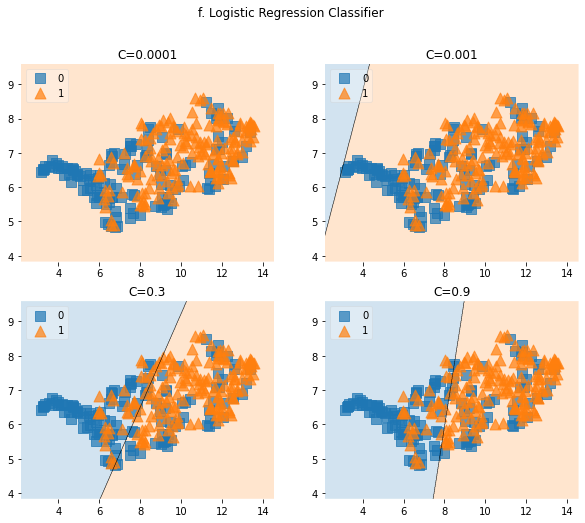

In [58]:
# 1. Creating one instance for each Decision Tree
LR1 = LogisticRegression(C=0.0001, solver='liblinear') # random_state=0
LR2 = LogisticRegression(C=0.001, solver='liblinear') # random_state=0
LR3 = LogisticRegression(C=0.3, solver='liblinear') # random_state=0
LR4 = LogisticRegression(C=0.9, solver='liblinear') # random_state=0

# 2. Creating a list of classifiers and their names for plotting
clf_list = [LR1, LR2, LR3, LR4]
labels = ['C=0.0001','C=0.001','C=0.3','C=0.9']

# ======================================================================== 
##### 3. parameters to set size or markers, contours, and transparency 
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7} 
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7} 
# ========================================================================

# 4. plotting the decision boundaries
fig = plt.figure(figsize=(10,8)) 
count = 0;

for clf, label in zip(clf_list, labels): 
    count = count + 1;
    clf.fit(embedding, Y)
    ax = plt.subplot(2,2,count)
    plt.suptitle("f. Logistic Regression Classifier")
    fig = plot_decision_regions(X=embedding, y=Y, clf=clf, legend=2, 
                                scatter_kwargs=scatter_kwargs,
                                contourf_kwargs=contourf_kwargs, 
                                scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(label) 
plt.savefig('/Users/yuhuicao/Desktop/2. Classification - normal/Decision Boundary/6. Logistic Regression (Classifier) Boundary.png')
plt.show()